## Cyclistic Bike Share case study 
​
### Name: Peter Mikhail
​
### Date: July 21, 2023
​
### Tool: R Programming Language
​
### Introduction
​
This case study is my capstone project of the Google Data Analytics course.
​
In this case study, I will perform many real-world tasks of a junior data analyst. I will imagine I am working for a fictional company called, Cyclistic, a bike share company in Chicago. In order to answer the key business questions, I will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act.
​
In this version of case study, I will perform all the processes of data analysis in R.
​
 ### Scenario
 
I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. This company has two types of customers, Casual riders, and members. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data visualizations.
​
### The Objective 
​
How do annual members and casual riders use Cyclistic bikes differently?
​
### Deliverables
​
1. A clear statement of the business task
​
2. A description of all data sources used
 
3. Documentation of any cleaning or manipulation of data
​
4. A summary of my analysis
​
5. Supporting visualizations and key findings 
​
6. my top three recommendations based on your analysis
​
### The data analysis process
​
### Prepare 
​
I used Cyclistic’s historical trip data from the previous 12 months( January to December, 2022). It is a public dataset located on the cloud (AWS). The data was downloaded and stored on my local drive for further exploration.  
The data is ROCC compliant. It is reliable, original, comprehensive, current, and cited.
​
### Process 
​
In data processing, I will use R to combine, clean, transform the data to be ready for analysis.
​
First, I need to call the following libraries


In [4]:
library(tidyverse)
library(janitor) # for data cleaning
library(lubridate) # for date format

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [3]:
# Load our files (12 month) and assign variables to them
d1<- read.csv("/kaggle/input/capstone-project-google-data-analytics-2023/202201-divvy-tripdata.csv")
d2 <- read.csv("/kaggle/input/capstone-project-google-data-analytics-2023/202202-divvy-tripdata.csv")
d3 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202203-divvy-tripdata.csv")
d4 <- read.csv("/kaggle/input/capstone-project-google-data-analytics-2023/202204-divvy-tripdata.csv")
d5 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202205-divvy-tripdata.csv")
d6 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202206-divvy-tripdata.csv")
d7 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202207-divvy-tripdata.csv")
d8 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202208-divvy-tripdata.csv")
d9 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202209-divvy-publictripdata.csv")
d10 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202210-divvy-tripdata.csv")
d11 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202211-divvy-tripdata.csv")
d12 <- read.csv ("/kaggle/input/capstone-project-google-data-analytics-2023/202212-divvy-tripdata.csv")


In [5]:
# combine all files together. I am going to use rbind considering that all the files have the same columns and same format. I am just combining rows
rides <-rbind(d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12)

In [6]:
nrow(rides)


[1] 5667717

In [7]:
str(rides)

'data.frame':	5667717 obs. of  13 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : nu

In [8]:
# calculate ride length by subtracting ended_at time from started_at time and converted it to minutes, then assign a variable name to new column
rides$ride_length <- difftime(rides$ended_at, rides$started_at, units = "mins")

In [9]:
# I will use the timestamp to extract the date, the month, the day of the week into new columns
rides$day <-  wday(rides$started_at, label = TRUE)
rides$month <- month(rides$started_at,label = TRUE)
rides$hour <- hour(rides$started_at)


In [10]:
head(rides)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day,month,hour
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<ord>,<ord>,<int>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2.950000 mins,Thu,Jan,11
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,4.350000 mins,Mon,Jan,8
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4.350000 mins,Tue,Jan,4
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,14.933333 mins,Tue,Jan,0
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6.033333 mins,Thu,Jan,1
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3.366667 mins,Tue,Jan,18


### Analyze
 I will analyze the data to see the different trends between the casual customers and  members and how they use the bike-share service  differently.Therefore, we gain more insight on how to convert the casual members to  loyal members. I developed the following connections to analyze and visualize the data

1- Show the total number of rides per user type.

 
2-	Show average trip duration per user in 2022.
 


3-	Show total rides per weekdays per user type.
 
4-	Show total rides per month per user type. 

 
5-	Show total rides per hour per user type. 
 
6-	To show total rides per bike type per user type.
 



In [24]:
# total number of rides per user type
user_type <- rides %>%
group_by(member_casual)%>%
summarize(num_of_rides=n())
user_type

member_casual,num_of_rides
<chr>,<int>
casual,2322032
member,3345685


Saving 12.5 x 6.67 in image


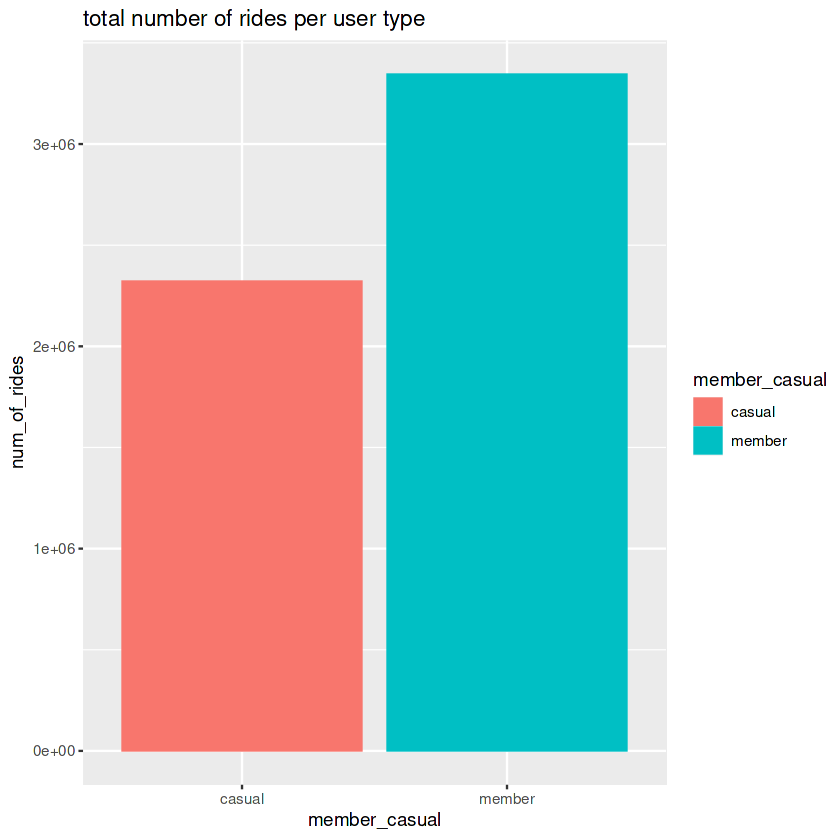

In [47]:
plot1<- ggplot(user_type) + geom_col(aes(x= member_casual , y= num_of_rides, color =member_casual , fill=member_casual )) + labs(title="total number of rides per user type")
plot1
ggsave("plot1.png")

In [43]:
# Show average trip duration per user in 2022.
avg_trip <- rides %>%
group_by(member_casual)%>%
summarize(average_trip_duration=mean(ride_length))
avg_trip

member_casual,average_trip_duration
<chr>,<drtn>
casual,29.14429 mins
member,12.71042 mins


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Saving 12.5 x 6.67 in image
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


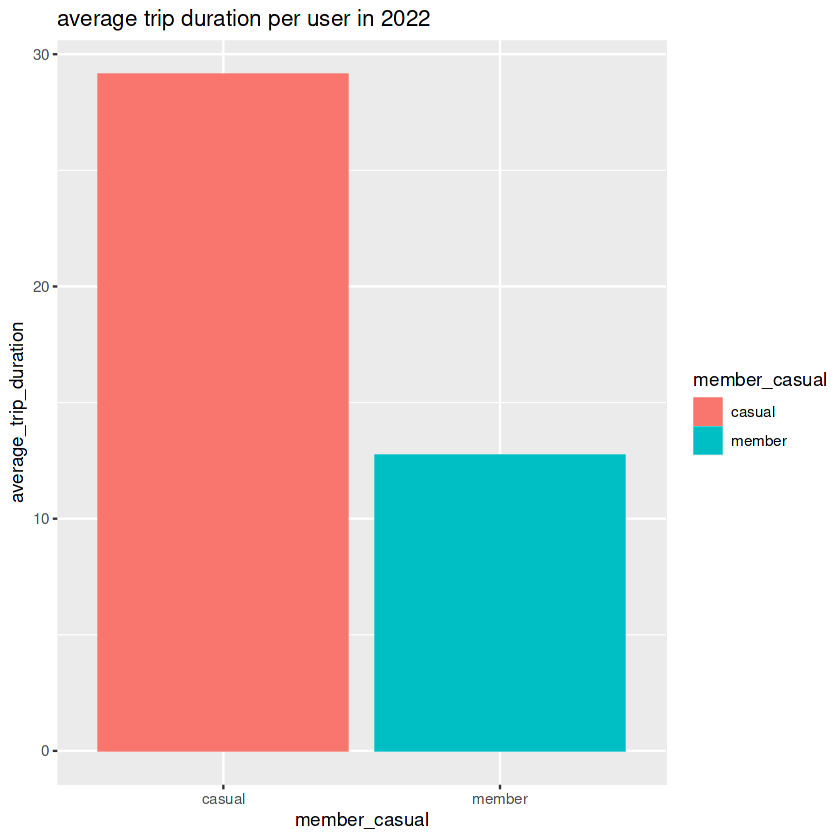

In [50]:
plot2<- ggplot(avg_trip) + geom_col(aes(x= member_casual , y= average_trip_duration, color =member_casual , fill=member_casual )) + labs(title= "average trip duration per user in 2022")
plot2
ggsave("plot2.png")

In [51]:
# Show total rides per weekdays per user type.
weekdays <- rides %>%
group_by(day, member_casual)%>%
summarize(num_of_rides=n())
weekdays

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


day,member_casual,num_of_rides
<ord>,<chr>,<int>
Sun,casual,389036
Sun,member,387223
Mon,casual,277675
Mon,member,473339
Tue,casual,263746
Tue,member,518626
Wed,casual,274354
Wed,member,523869
Thu,casual,309330


Saving 12.5 x 6.67 in image


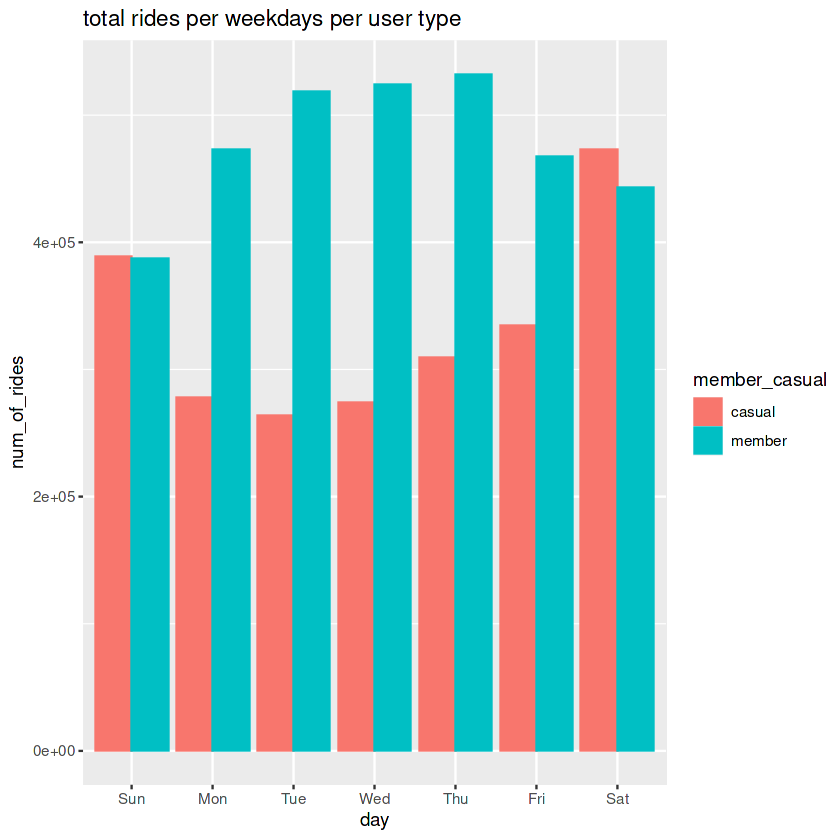

In [55]:
plot3<- ggplot(weekdays) + geom_col( position = "dodge", aes(x= day , y= num_of_rides, color =member_casual , fill=member_casual)) + labs(title= "total rides per weekdays per user type")
plot3
ggsave("plot3.png")

In [56]:
#  Show total rides per month per user type.
months <- rides %>%
group_by(month, member_casual)%>%
summarize(num_of_rides=n())
months

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,member_casual,num_of_rides
<ord>,<chr>,<int>
Jan,casual,18520
Jan,member,85250
Feb,casual,21416
Feb,member,94193
Mar,casual,89882
Mar,member,194160
Apr,casual,126417
Apr,member,244832
May,casual,280415


Saving 12.5 x 6.67 in image


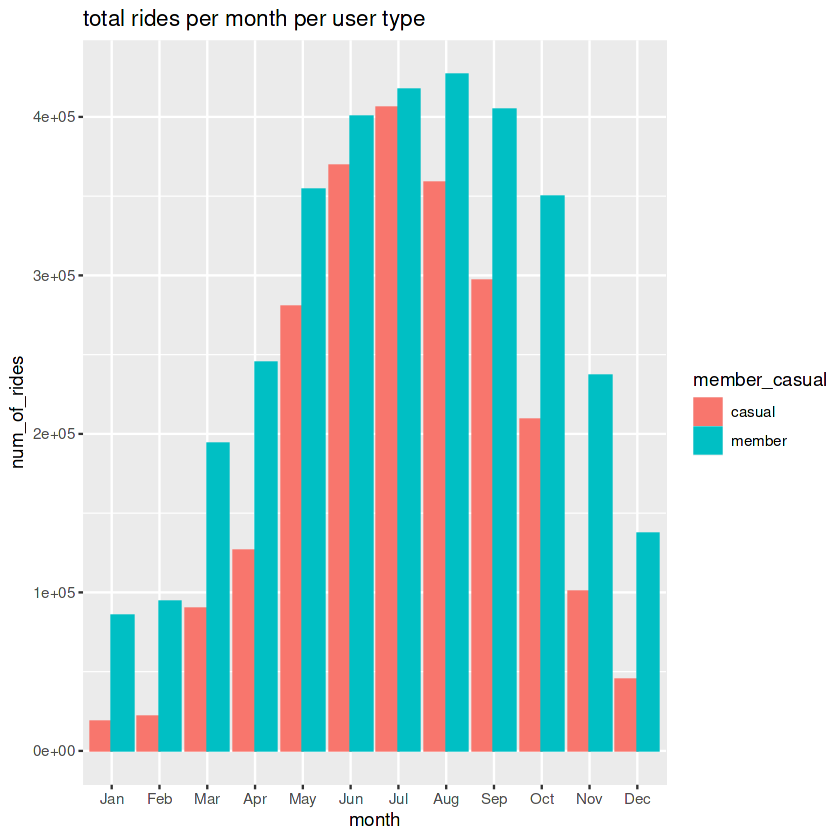

In [57]:
plot4<- ggplot(months) + geom_col( position = "dodge", aes(x= month , y= num_of_rides, color =member_casual , fill=member_casual)) + labs(title= "total rides per month per user type")
plot4
ggsave("plot4.png")

# Show total rides per hour per user type.
hours <- rides %>%
group_by(hour, member_casual)%>%
summarize(num_of_rides=n())
hours

Saving 12.5 x 6.67 in image


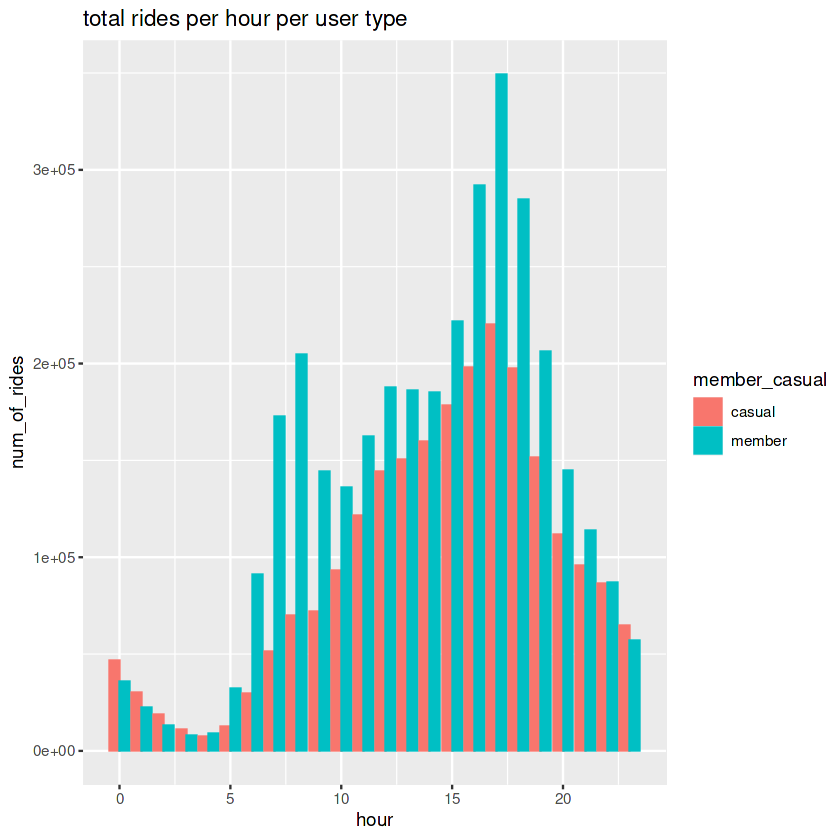

In [61]:
plot5<- ggplot(hours) + geom_col( position = "dodge", aes(x= hour , y= num_of_rides, color =member_casual , fill=member_casual)) + labs(title= "total rides per hour per user type")
plot5
ggsave("plot5.png")

In [62]:
#  To show total rides per bike type per user type.
type <- rides %>%
group_by(rideable_type, member_casual)%>%
summarize(num_of_rides=n())
type

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


rideable_type,member_casual,num_of_rides
<chr>,<chr>,<int>
classic_bike,casual,891459
classic_bike,member,1709755
docked_bike,casual,177474
electric_bike,casual,1253099
electric_bike,member,1635930


Saving 12.5 x 6.67 in image


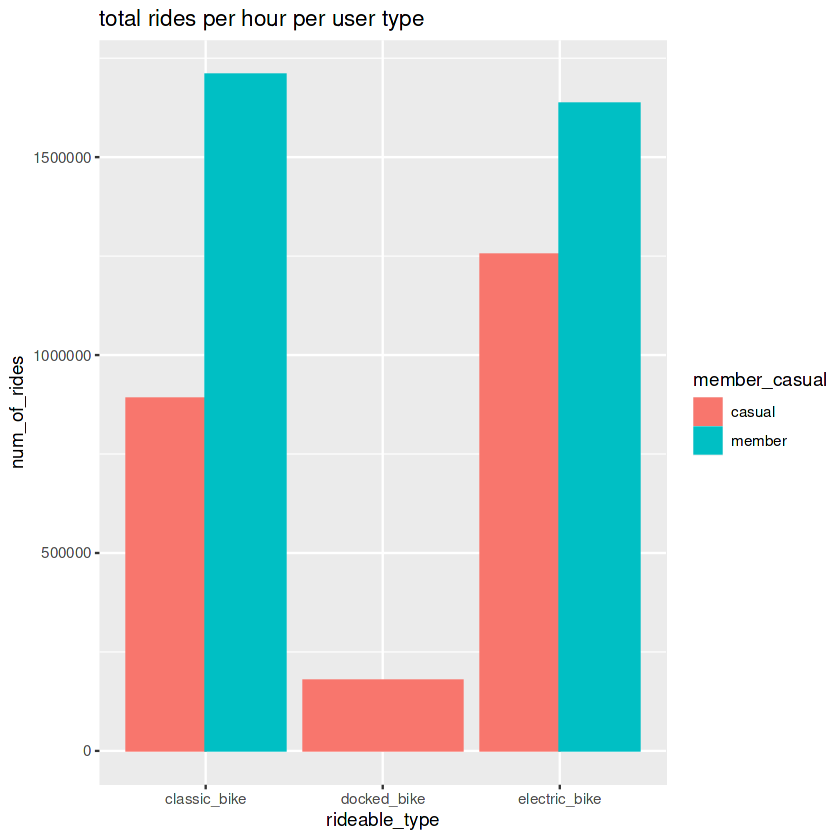

In [64]:
plot6<- ggplot(type) + geom_col( position = "dodge", aes(x= rideable_type , y= num_of_rides, color =member_casual , fill=member_casual)) + labs(title= "total rides per hour per user type")
plot6
ggsave("plot6.png")

## Summary and Key Findings

It can be clearly seen from the visualizations that;

1-	The average trip duration of casual users is a higher than that of the members. This is because casual users take the advantage of the allowed time when they purchase the day pass, while the members do not do that because they have a consistent membership during the year.

2-	The most popular days for casual users are Saturdays and Sundays, while the most popular days for the members are the weekdays. This is because members presumably use their bike for commuting to work, while casual members use their bike in leisure days. 

3-	Summer months are the most popular among the casual users and members.

4-	The most popular hours for both casual users and members are from 4 P.M to 6 P.M.

### Recommendations

1-	We can initiate adverting campaign to target casual users who work in the city to get the annual membership, so they can use their bike for both commuting and leisure.
2-	We can target casual users during the summer months to get the annual membership to save money specially during the peak season.
3-	Casual users have more preferences to electric bikes. Therefore, improving the quality of electric bikes can motivate them to buy the annual membership.
